# Corona Data Set - CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
import tensorflow as tf
from keras.layers import Dense, ZeroPadding2D , Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.models import Sequential
from keras.preprocessing import image

In [3]:
trgen=image.ImageDataGenerator(rescale=1/255)
vagen=image.ImageDataGenerator(rescale=1/255)
data_train=trgen.flow_from_directory('E:/Education of Coding/Data Science Coding/Practicing For Projects/project-6/carona_lungs_data_set/data/train',
                                         target_size=(256,256),batch_size=16)
data_val=vagen.flow_from_directory("E:/Education of Coding/Data Science Coding/Practicing For Projects/project-6/carona_lungs_data_set/data/test",
                                         target_size=(256,256),batch_size=16,class_mode='binary')

Found 151 images belonging to 1 classes.
Found 151 images belonging to 1 classes.


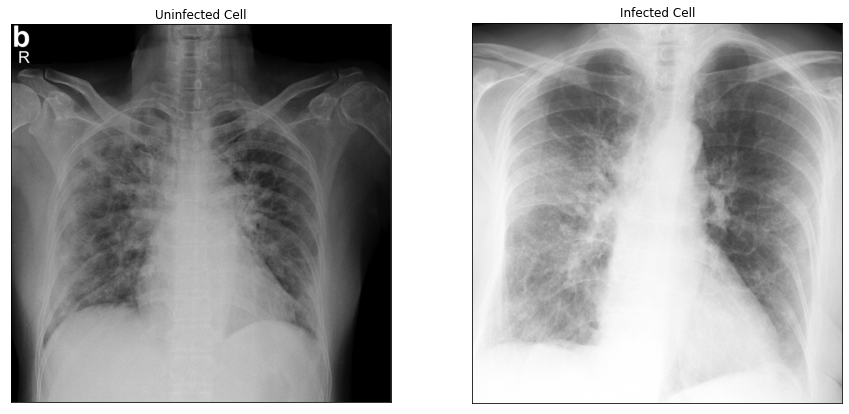

In [4]:
import cv2

upic= 'E:/Education of Coding/Data Science Coding/Practicing For Projects/project-6/carona_lungs_data_set/data/train/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg'
apic= 'E:/Education of Coding/Data Science Coding/Practicing For Projects/project-6/carona_lungs_data_set/data/train/covid/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [5]:
# Model
model = Sequential()

# CONV1 
model.add(ZeroPadding2D(padding=(2,2), input_shape=(256,256,3)))
model.add(Conv2D(64, kernel_size =(3,3), strides=(1,1),padding='SAME', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1),padding='SAME'))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(0.2))

# CONV2
model.add(ZeroPadding2D(padding=(2,2), input_shape=(256,256,3)))
model.add(Conv2D(32, kernel_size =(3,3), strides=(1,1),padding='SAME', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1),padding='SAME'))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(0.5))

# CONV3
model.add(ZeroPadding2D(padding=(2,2), input_shape=(256,256,3)))
model.add(Conv2D(32, kernel_size =(3,3), strides=(1,1),padding='SAME', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1),padding='SAME'))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(0.5))

# CONV4
model.add(ZeroPadding2D(padding=(2,2), input_shape=(256,256,3)))
model.add(Conv2D(16, kernel_size =(3,3), strides=(1,1),padding='SAME', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1),padding='SAME'))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(0.75))

# Flatten
model.add(Flatten())

# Dense 1
model.add(Dense(64,activation= 'relu'))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(0.2))

# Dense 2
model.add(Dense(32,activation= 'relu'))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(0.3))

# Dense 3
model.add(Dense(16,activation= 'relu'))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(0.5))

# Dense 4
model.add(Dense(1,activation= 'sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 260, 260, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 260, 260, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 260, 260, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 260, 260, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 260, 260, 64)      0         
                                                        

In [8]:
from keras.optimizers import RMSprop , SGD , Adam

# Optimizers
Ad = Adam(learning_rate = 0.01)

# Compile Model
model.compile(loss='binary_crossentropy', optimizer= Ad ,metrics=['accuracy'])

# Fitting Model
history = model.fit_generator(data_train,
                    validation_data=data_val,
                    epochs=10, 
                    steps_per_epoch=5, 
                    validation_steps=5)

C:\Users\Fingers\AppData\Local\Temp\ipykernel_10796\2867442309.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_train,


Epoch 1/10
5/5 [==============================] - 54s 11s/step - loss: 1.0045 - accuracy: 0.4250 - val_loss: 16.2916 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 46s 11s/step - loss: 0.7095 - accuracy: 0.6197 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 51s 10s/step - loss: 0.6330 - accuracy: 0.6750 - val_loss: 4.9684e-21 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 47s 10s/step - loss: 0.4181 - accuracy: 0.8451 - val_loss: 1.3138e-12 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 46s 9s/step - loss: 0.4847 - accuracy: 0.8451 - val_loss: 7.6069e-14 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 47s 10s/step - loss: 0.3224 - accuracy: 0.9577 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 46s 9s/step - loss: 0.2992 - accuracy: 0.9437 - val_loss: 2.2892 - val_accuracy: 0.5125
Epoch 8/10
5

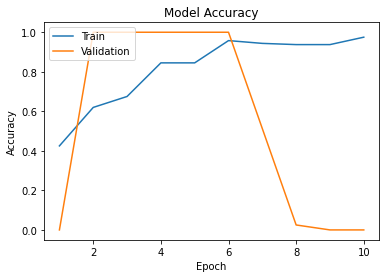

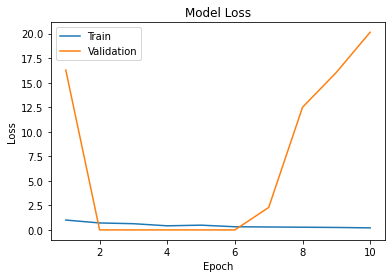

In [9]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

plotLearningCurve(history,10)